do correlation analysis in kreise and connect ones that have corr>0.99

dataset: **f**irmen**v**eränderung (company changes)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
cd ..

/Users/cinny/GitHub/Map-Tool


In [4]:
df = pd.read_csv('data/firmenveraenderungen.csv')

In [5]:
df.shape

(10028, 34)

In [14]:
len(df['ags5'].unique())

402

In [16]:
10028/402

24.945273631840795

In [17]:
list(df[df['ags5']==1001]['variable'])

['kr_firm_br_a_m',
 'kr_firm_br_b_m',
 'kr_firm_br_c_m',
 'kr_firm_br_d_m',
 'kr_firm_br_e_m',
 'kr_firm_br_f_m',
 'kr_firm_br_g_m',
 'kr_firm_br_h_m',
 'kr_firm_br_i_m',
 'kr_firm_br_j_m',
 'kr_firm_br_k_m',
 'kr_firm_br_l_m',
 'kr_firm_br_m_m',
 'kr_firm_br_n_m',
 'kr_firm_br_o_m',
 'kr_firm_br_p_m',
 'kr_firm_br_q_m',
 'kr_firm_br_r_m',
 'kr_firm_br_s_m',
 'kr_firm_br_t_m',
 'kr_firm_br_u_m',
 'kr_firm_br_99_m',
 'kr_firm_neug_m',
 'kr_firm_loesch_m',
 'kr_firm_liq_m']

In [ ]:
# a - Monthly Company changes in economic sectors - agriculture, forestry and ﬁshing
# b - Monthly Company changes in the economic sector - mining and quarrying of stones and earth
# c - Monthly Company changes in the economic sector - manufacturing
# d - Monthly Company changes in the economic sector - energy supply
# e - Monthly Company changes in business sector - water supply; Sewage and waste disposal and pollution removal
# f - Monthly Company changes in the economic sector - construction
# g - Monthly Company changes in business sector - trade; Maintenance and repair of motor vehicles
# h - Monthly Company changes in the economic sector - transport and storage
# i - Monthly Company changes in the business sector - hospitality
# j - Monthly Company changes in the business sector - information and communication
# k - Monthly Company changes in the economic sector - provision of ﬁnancial and insurance services
# l - Monthly Company changes in the economic sector - real estate and housing
# m - Monthly Company changes in the economic sector - provision of professional, scientiﬁc and technical services
# n - Monthly Company changes in the economic sector - provision of other economic services
# o - Monthly Company changes in the economic sector - public administration, defense; social insurance
# p - Monthly Company changes in business sector - education and teaching
# q - Monthly Company changes in the economic sector - health and social services
# r - Monthly Corporate changes in business - arts, entertainment and recreation
# s - Monthly Company changes in the economic sector - provision of other services
# t - Monthly Company changes in the economic sector - private households with domestic staff; 
#    Manufacture of goods and provision of services by private households for their own use without a pronounced focus
# u - Monthly Company changes in the economic sector - extraterritorial organizations and corporations
# 99 - Monthly Company changes in the economic sector - no information

# neug - Startups by month
# loesch - Company deletions by month
# liq - Company liquidations by month

In [18]:
# fix ags5 code to be len=5, add 0 at front
def fix_ags5(x):
    if len(str(x))==4:
        return '0'+str(x)
    else:
        return str(x)
df['ags5'] = df['ags5'].apply(fix_ags5)

In [37]:
# filter_col1 = [col for col in df if col.startswith('kr_firm_neug_m')]
# filter_col2 = [col for col in df if col.startswith('kr_firm_loesch_m')]
filter_col1 = df[df['variable']=='kr_firm_neug_m']
filter_col2 = df[df['variable']=='kr_firm_loesch_m']

In [49]:
df_kr_firm = pd.concat([filter_col1, filter_col2])

In [50]:
df_kr_firm_corr = df_kr_firm.set_index('ags5')[df_kr_firm.columns[6:]]

In [51]:
df_kr_firm_corr.transpose().corr()

ags5,01001,01002,01003,01004,01051,01053,01054,01055,01056,01057,...,16069,16070,16071,16072,16073,16074,16075,16076,16077,07000
ags5,,,,,,,,,,,,,,,,,,,,,
01001,1.000000,0.392424,0.157169,0.413639,0.115426,0.067385,0.167150,0.515951,0.134872,0.260702,...,-0.078988,-0.242141,-0.194731,0.087949,-0.250017,-0.054996,-0.187643,0.246278,-0.342404,NaN
01002,0.392424,1.000000,0.432148,0.481229,0.232522,0.257395,0.246655,0.363805,0.132009,0.157200,...,0.135734,-0.071608,-0.083734,0.012874,-0.206203,0.171747,-0.165509,0.228491,-0.187418,NaN
01003,0.157169,0.432148,1.000000,0.039611,0.096414,-0.010030,0.355759,0.441044,0.210534,0.219988,...,0.307434,0.165531,0.098252,-0.032778,0.289149,0.046865,0.035979,0.229707,0.285143,NaN
01004,0.413639,0.481229,0.039611,1.000000,0.246905,0.322580,0.126803,0.471813,0.410773,0.178058,...,-0.367688,-0.090813,-0.050024,0.274322,-0.549831,-0.061500,-0.217160,0.018329,-0.420890,NaN
01051,0.115426,0.232522,0.096414,0.246905,1.000000,0.064754,0.352574,0.304937,0.376008,-0.037945,...,0.017383,0.066082,0.085376,-0.096263,-0.108485,-0.173780,0.144534,0.056876,-0.351685,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16074,-0.054996,0.171747,0.046865,-0.061500,-0.173780,0.383576,-0.241792,0.001062,-0.302187,0.265249,...,-0.085874,-0.301566,0.178930,0.079039,-0.020751,1.000000,0.196275,0.026252,0.370394,NaN
16075,-0.187643,-0.165509,0.035979,-0.217160,0.144534,-0.135437,-0.325759,-0.225465,-0.036996,-0.014428,...,0.166189,-0.040069,0.122328,0.074584,0.248791,0.196275,1.000000,-0.249747,-0.113127,NaN
16076,0.246278,0.228491,0.229707,0.018329,0.056876,0.028495,0.228477,0.352878,0.305600,0.166715,...,0.413424,0.323766,0.110385,0.270655,0.063364,0.026252,-0.249747,1.000000,0.259683,NaN


In [53]:
(sum((df_kr_firm_corr.transpose().corr()>0.99).sum())-401)//2

200

In [55]:
kreise1 = []
kreise2 = []
source = []
target = []
value = []
#size = list(df['kr_ka_au_202104'])

for col in range(400):
    for row in range(col,400):
        ratio = df_kr_firm_corr.transpose().corr().iloc[col][row]
        # logging
        if (col in list(range(0,401,10))) and (row in list(range(0,401,10))) and (col==row):
            print(f'{col} rows processed ...')
        # high correlation
        if (ratio>0.99) and (ratio<1):
            ags5 = df_kr_firm_corr.transpose().corr().index
            kreise1.append(ags5[col])
            kreise2.append(ags5[row])
            source.append(col)
            target.append(row)
            value.append(ratio)

0 rows processed ...
10 rows processed ...
20 rows processed ...
30 rows processed ...
40 rows processed ...
50 rows processed ...
60 rows processed ...
70 rows processed ...
80 rows processed ...
90 rows processed ...
100 rows processed ...
110 rows processed ...
120 rows processed ...
130 rows processed ...
140 rows processed ...
150 rows processed ...
160 rows processed ...
170 rows processed ...
180 rows processed ...
190 rows processed ...
200 rows processed ...
210 rows processed ...
220 rows processed ...
230 rows processed ...
240 rows processed ...
250 rows processed ...
260 rows processed ...
270 rows processed ...
280 rows processed ...
290 rows processed ...
300 rows processed ...
310 rows processed ...
320 rows processed ...
330 rows processed ...
340 rows processed ...
350 rows processed ...
360 rows processed ...
370 rows processed ...
380 rows processed ...
390 rows processed ...


In [56]:
match = pd.DataFrame({'kreise1': kreise1, 'kreise2': kreise2,
                      'source': source, 'target': target,
                      'value': value})

In [57]:
match['group'] = match['kreise1'].astype(str).str[:2]
# match['bd1'] = match['kreise1'].str[:2]
# match['bd2'] = match['kreise2'].str[:2]

In [58]:
match.shape

(0, 6)

In [177]:
# linksdf = match[['source', 'target', 'value', 'group']]
# #links = linksdf.to_dict('index')
# links = linksdf.T.to_dict().values()
# links = str(links)[12:-1].replace("'", '"')

In [178]:
# nodesdf = df[['ags5', 'ags2', 'kr_ka_au_202009']]
# nodesdf.columns = ['name', 'group', 'size']
# nodes = nodesdf.T.to_dict().values()
# nodes = str(nodes)[12:-1].replace("'", '"')

In [179]:
# network = '{"nodes": ' + nodes + ', "links": ' + links + '}'

In [180]:
# with open('network.txt', 'w') as writer:
#     writer.write(network)

In [134]:
# {"nodes": [
#     {"name": "Azza Abouzied", "group": 3, "size": 21.0}, {"name": "Maeda F", "group": 3, "size": 2.26}, 
#     {"name": "Hanafi", "group": 3, "size": 0.24}, {"name": "Miro Mannino", "group": 3, "size": 0.36}], 
#  "links": [
#      {"source": 0, "target": 3, "value": 3, "group": 1}, {"source": 4, "target": 5, "value": 3, "group": 1}, 
#      {"source": 4, "target": 6, "value": 3, "group": 1}, {"source": 5, "target": 4, "value": 3, "group": 1}]}

No handles with labels found to put in legend.


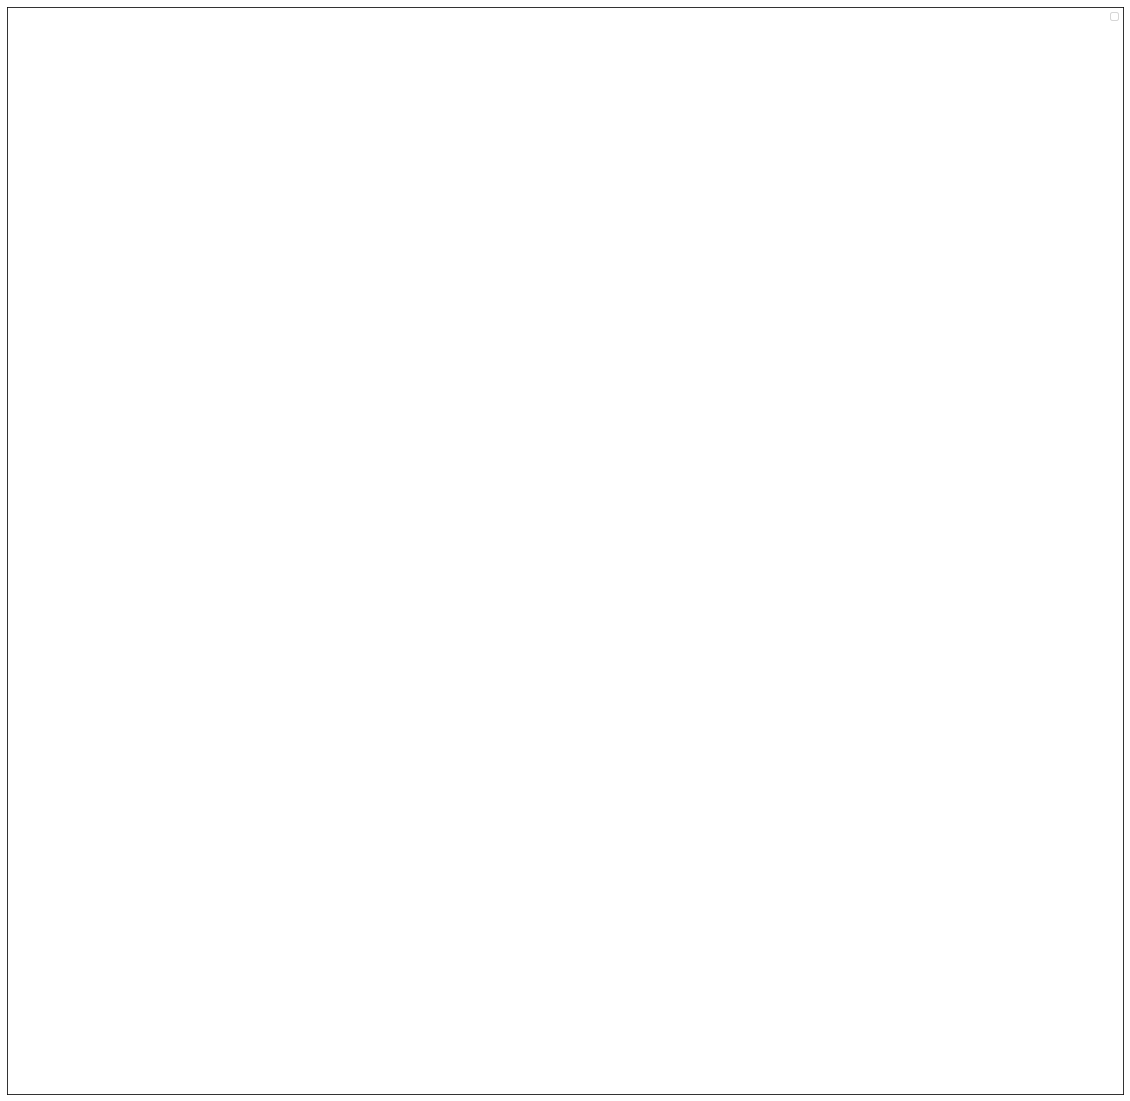

In [59]:
plt.figure(figsize=(20,20))

G01 = nx.from_pandas_edgelist(match[match['group']=='01'], source='kreise1', target='kreise2')
G02 = nx.from_pandas_edgelist(match[match['group']=='02'], source='kreise1', target='kreise2')
G03 = nx.from_pandas_edgelist(match[match['group']=='03'], source='kreise1', target='kreise2')
G04 = nx.from_pandas_edgelist(match[match['group']=='04'], source='kreise1', target='kreise2')
G05 = nx.from_pandas_edgelist(match[match['group']=='05'], source='kreise1', target='kreise2')
G06 = nx.from_pandas_edgelist(match[match['group']=='06'], source='kreise1', target='kreise2')
G07 = nx.from_pandas_edgelist(match[match['group']=='07'], source='kreise1', target='kreise2')
G08 = nx.from_pandas_edgelist(match[match['group']=='08'], source='kreise1', target='kreise2')
G09 = nx.from_pandas_edgelist(match[match['group']=='09'], source='kreise1', target='kreise2')
G10 = nx.from_pandas_edgelist(match[match['group']=='10'], source='kreise1', target='kreise2')
G11 = nx.from_pandas_edgelist(match[match['group']=='11'], source='kreise1', target='kreise2')
G12 = nx.from_pandas_edgelist(match[match['group']=='12'], source='kreise1', target='kreise2')
G13 = nx.from_pandas_edgelist(match[match['group']=='13'], source='kreise1', target='kreise2')
G14 = nx.from_pandas_edgelist(match[match['group']=='14'], source='kreise1', target='kreise2')
G15 = nx.from_pandas_edgelist(match[match['group']=='15'], source='kreise1', target='kreise2')
G16 = nx.from_pandas_edgelist(match[match['group']=='16'], source='kreise1', target='kreise2')

Gmatch = nx.from_pandas_edgelist(match, source='kreise1', target='kreise2')
pos = nx.spring_layout(Gmatch)
options = {'node_size':50, 'alpha':1, 'width':0.1, 'font_size':8}

nx.draw_networkx(G01, pos, with_labels=True, node_color="#d3d3d3", label='01', **options)
nx.draw_networkx(G02, pos, with_labels=True, node_color="#9c9d97", label='02', **options)
nx.draw_networkx(G03, pos, with_labels=True, node_color="#474f52", label='03', **options)
nx.draw_networkx(G04, pos, with_labels=True, node_color="#1d1c21", label='04', **options)
nx.draw_networkx(G05, pos, with_labels=True, node_color="#ffd83d", label='05', **options)
nx.draw_networkx(G06, pos, with_labels=True, node_color="#f9801d", label='06', **options)
nx.draw_networkx(G07, pos, with_labels=True, node_color="#b02e26", label='07', **options)
nx.draw_networkx(G08, pos, with_labels=True, node_color="#825432", label='08', **options)
nx.draw_networkx(G09, pos, with_labels=True, node_color="#80c71f", label='09', **options)
nx.draw_networkx(G10, pos, with_labels=True, node_color="#5d7c15", label='10', **options)
nx.draw_networkx(G11, pos, with_labels=True, node_color="#3ab3da", label='11', **options)
nx.draw_networkx(G12, pos, with_labels=True, node_color="#169c9d", label='12', **options)
nx.draw_networkx(G13, pos, with_labels=True, node_color="#3c44a9", label='13', **options)
nx.draw_networkx(G14, pos, with_labels=True, node_color="#f38caa", label='14', **options)
nx.draw_networkx(G15, pos, with_labels=True, node_color="#c64fbd", label='15', **options)
nx.draw_networkx(G16, pos, with_labels=True, node_color="#8932b7", label='16', **options)

plt.legend()
plt.show()

In [60]:
[len(c) for c in sorted(nx.connected_components(Gmatch), key=len, reverse=True)]

[]

In [61]:
clusters = [c for c in sorted(nx.connected_components(Gmatch), key=len, reverse=True)]

In [62]:
for c in clusters:
    c = list(c)
    c = [str(i) for i in c]
    counties = df[df['ags5'].isin(c)]
    print(list(counties['kreis']))

In [286]:
cluster1 = df_kr_alq[df_kr_alq['kreis'].isin(['Wesel', 'Unna', 'Nürnberg'])][filter_col]
cluster1.shape

(3, 28)

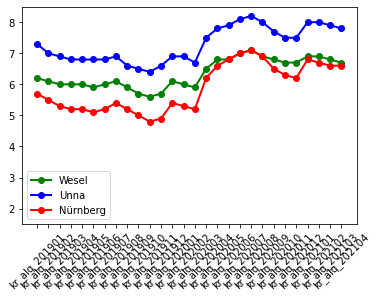

In [320]:
plt.plot(cluster1.columns, cluster1.iloc[0], 'go-', label='Wesel', linewidth=2)
plt.plot(cluster1.columns, cluster1.iloc[1], 'bo-', label='Unna', linewidth=2)
plt.plot(cluster1.columns, cluster1.iloc[2], 'ro-', label='Nürnberg', linewidth=2)
plt.xticks(rotation=45)
plt.ylim(1.5, 8.5)
plt.legend()

In [312]:
cluster1

,kr_alq_201901,kr_alq_201902,kr_alq_201903,kr_alq_201904,kr_alq_201905,kr_alq_201906,kr_alq_201907,kr_alq_201908,kr_alq_201909,kr_alq_201910,...,kr_alq_202007,kr_alq_202008,kr_alq_202009,kr_alq_202010,kr_alq_202011,kr_alq_202012,kr_alq_202101,kr_alq_202102,kr_alq_202103,kr_alq_202104
77,6.2,6.1,6.0,6.0,6.0,5.9,6.0,6.1,5.9,5.7,...,7.0,7.1,6.9,6.8,6.7,6.7,6.9,6.9,6.8,6.7
115,7.3,7.0,6.9,6.8,6.8,6.8,6.8,6.9,6.6,6.5,...,8.1,8.2,8.0,7.7,7.5,7.5,8.0,8.0,7.9,7.8
283,5.7,5.5,5.3,5.2,5.2,5.1,5.2,5.4,5.2,5.0,...,7.0,7.1,6.9,6.5,6.3,6.2,6.8,6.7,6.6,6.6


In [ ]:
#kr_firm = [22295, 17645, 29263] #>75%

In [ ]:
# Wesel is a city in North Rhine-Westphalia, Germany. It is the capital of the Wesel district.
# Unna is a city of around 57,000 people in North Rhine-Westphalia, Germany, the seat of the Unna district.
# Nuremberg is the second-largest city of the German state of Bavaria after its capital Munich, and its 518,370 inhabitants make it the 14th-largest city in Germany.

In [292]:
cluster2 = df_kr_alq[df_kr_alq['kreis'].isin(['Fulda', 'Neuwied', 'Gotha'])][filter_col]
cluster2.shape

(3, 28)

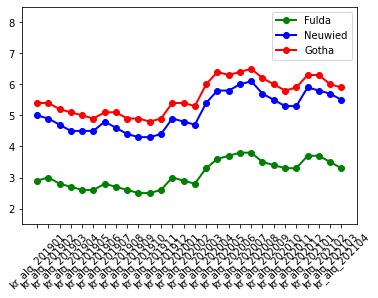

In [321]:
plt.plot(cluster2.columns, cluster2.iloc[0], 'go-', label='Fulda', linewidth=2)
plt.plot(cluster2.columns, cluster2.iloc[1], 'bo-', label='Neuwied', linewidth=2)
plt.plot(cluster2.columns, cluster2.iloc[2], 'ro-', label='Gotha', linewidth=2)
plt.xticks(rotation=45)
plt.ylim(1.5, 8.5)
plt.legend()

In [297]:
cluster3 = df_kr_alq[df_kr_alq['kreis'].isin(
    ['Ortenaukreis', 'Dachau', 'Ebersberg', 'Erding', 'Freising', 'Landsberg am Lech', 
     'Erlangen-Höchstadt', 'Dillingen a.d.Donau'])][filter_col]
cluster3.shape

(8, 28)

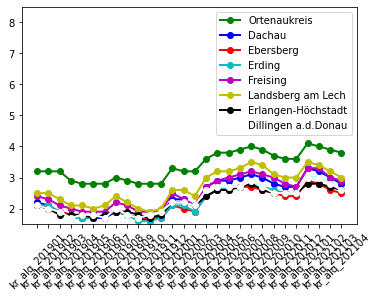

In [322]:
plt.plot(cluster3.columns, cluster3.iloc[0], 'go-', label='Ortenaukreis', linewidth=2)
plt.plot(cluster3.columns, cluster3.iloc[1], 'bo-', label='Dachau', linewidth=2)
plt.plot(cluster3.columns, cluster3.iloc[2], 'ro-', label='Ebersberg', linewidth=2)
plt.plot(cluster3.columns, cluster3.iloc[3], 'co-', label='Erding', linewidth=2)
plt.plot(cluster3.columns, cluster3.iloc[4], 'mo-', label='Freising', linewidth=2)
plt.plot(cluster3.columns, cluster3.iloc[5], 'yo-', label='Landsberg am Lech', linewidth=2)
plt.plot(cluster3.columns, cluster3.iloc[6], 'ko-', label='Erlangen-Höchstadt', linewidth=2)
plt.plot(cluster3.columns, cluster3.iloc[7], 'wo-', label='Dillingen a.d.Donau', linewidth=2)
plt.xticks(rotation=45)
plt.ylim(1.5, 8.5)
plt.legend()

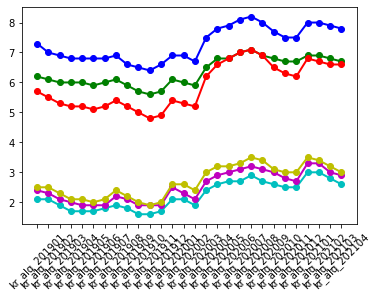

In [311]:
plt.plot(cluster1.columns, cluster1.iloc[0], 'go-', label='Wesel', linewidth=2)
plt.plot(cluster1.columns, cluster1.iloc[1], 'bo-', label='Unna', linewidth=2)
plt.plot(cluster1.columns, cluster1.iloc[2], 'ro-', label='Nürnberg', linewidth=2)

# plt.plot(cluster2.columns, cluster2.iloc[0], 'co-', label='Fulda', linewidth=2)
# plt.plot(cluster2.columns, cluster2.iloc[1], 'mo-', label='Neuwied', linewidth=2)
# plt.plot(cluster2.columns, cluster2.iloc[2], 'yo-', label='Gotha', linewidth=2)

plt.plot(cluster3.columns, cluster3.iloc[3], 'co-', label='Erding', linewidth=2)
plt.plot(cluster3.columns, cluster3.iloc[4], 'mo-', label='Freising', linewidth=2)
plt.plot(cluster3.columns, cluster3.iloc[5], 'yo-', label='Landsberg am Lech', linewidth=2)

plt.xticks(rotation=45)
#plt.legend()
plt.show()